In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_x = pd.read_csv('../2017/Problem-set-1/data/logistic_x.txt', sep='  ', header=None, names=['x1', 'x2'])
print(df_x)

x1        x2
0   1.343250 -1.331148
1   1.820553 -0.634668
2   0.986321 -1.888576
3   1.944373 -1.635452
4   0.976734 -1.353315
..       ...       ...
94  4.774854  0.099415
95  5.827485 -0.690058
96  2.289474  1.970760
97  2.494152  1.415205
98  2.084795  1.356725

[99 rows x 2 columns]


In [3]:
df_y = pd.read_csv('../2017/Problem-set-1/data/logistic_y.txt', sep='  ', header=None, names=['y'])
df_y = df_y.astype('int')
print(df_y)
print(type(df_y))

y
0  -1
1  -1
2  -1
3  -1
4  -1
.. ..
94  1
95  1
96  1
97  1
98  1

[99 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [4]:
df_x['label'] = df_y['y'].values
df_x

,x1,x2,label
0,1.343250,-1.331148,-1
1,1.820553,-0.634668,-1
2,0.986321,-1.888576,-1
3,1.944373,-1.635452,-1
4,0.976734,-1.353315,-1
...,...,...,...
94,4.774854,0.099415,1
95,5.827485,-0.690058,1
96,2.289474,1.970760,1
97,2.494152,1.415205,1


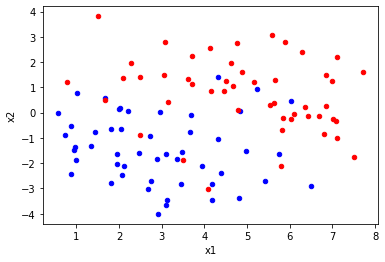

In [5]:
#  画图
ax = plt.axes()
df_x.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_x.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')


In [6]:
xs = df_x[['x1', 'x2']].values
xs[:20, :]

array([[ 1.3432504 , -1.3311479 ],
       [ 1.8205529 , -0.6346681 ],
       [ 0.98632067, -1.8885762 ],
       [ 1.9443734 , -1.635452  ],
       [ 0.97673352, -1.3533151 ],
       [ 1.9458584 , -2.0443278 ],
       [ 2.1075153 , -2.1256684 ],
       [ 2.070373  , -2.4634101 ],
       [ 0.86864964, -2.4119348 ],
       [ 1.8006594 , -2.7739689 ],
       [ 3.1283787 , -3.4452432 ],
       [ 3.0947429 , -3.6446145 ],
       [ 2.9086652 , -4.0065037 ],
       [ 2.6770338 , -3.0198592 ],
       [ 2.7458671 , -2.7100561 ],
       [ 4.1714647 , -3.4622482 ],
       [ 3.931322  , -2.1099044 ],
       [ 4.378687  , -2.3804743 ],
       [ 4.8016565 , -3.3803344 ],
       [ 4.166105  , -2.8138844 ]])

In [7]:
print(type(xs), '\n', xs.shape)

<class 'numpy.ndarray'> 
 (99, 2)


In [8]:
# 加上偏置值
xs_b = np.hstack([np.ones((xs.shape[0], 1)), xs])
print(xs_b.shape)
print(xs_b[:10, :])

(99, 3)
[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]
 [ 1.          1.9458584  -2.0443278 ]
 [ 1.          2.1075153  -2.1256684 ]
 [ 1.          2.070373   -2.4634101 ]
 [ 1.          0.86864964 -2.4119348 ]
 [ 1.          1.8006594  -2.7739689 ]]


In [9]:
ys = df_y['y'].values
print(ys.shape, type(ys))

(99,) <class 'numpy.ndarray'>


In [10]:
all_theta = []  #  保存每次的theta
theta = np.zeros(xs_b.shape[1]) # theta (3, )
tol = 1e9
n_iters = 0
while tol > 1e-6:
    # 计算sigmoid函数值
    zs = ys * xs_b.dot(theta) # (99, )
    gzs = 1 / (1 + np.exp(-zs)) # (99, )
    # 计算梯度
    nabla = np.mean((gzs - 1) * ys * xs_b.T, axis=1)
    # 计算海森矩阵
    hessian = np.zeros((xs_b.shape[1], xs_b.shape[1]))
    for i in range(hessian.shape[0]):
        # 海森矩阵对称，因此只计算上三角矩阵即可
        for j in range(i, hessian.shape[1]):
           hessian[i][j] = np.mean(gzs * (1 - gzs) * xs_b[:, i] * xs_b[:, j])
           if i != j:
               hessian[j][i] = hessian[i][j]
    # theta公式
    # 计算海森矩阵的逆矩阵
    hessian_ni = np.linalg.inv(hessian)
    # 计算delta
    delta = hessian_ni.dot(nabla)
    old_theta = theta.copy()
    theta -= delta
    all_theta.append(old_theta)
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {} iterations'.format(n_iters))

converged after 7 iterations


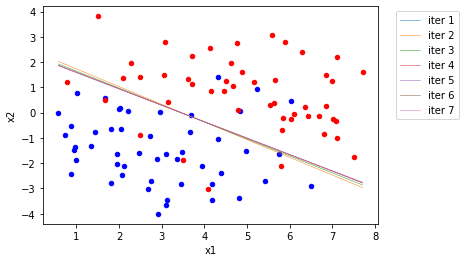

In [11]:
ax = plt.axes()

df_x.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_x.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xsb = np.array([np.min(xs_b[:,1]), np.max(xs_b[:,1])])
for k, theta in enumerate(all_theta):
    _ys = (theta[0] + theta[1] * _xsb) / (- theta[2])
    plt.plot(_xsb, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [12]:
theta

array([-2.6205116 ,  0.76037154,  1.17194674])

In [13]:
prob_y = 1 / (1 + np.exp(-1 * xs_b.dot(theta)))
prob_y

array([0.04073121, 0.12131754, 0.01656349, 0.04484215, 0.03035866,
       0.02828366, 0.02905196, 0.01920403, 0.00827117, 0.01096214,
       0.01366143, 0.01057479, 0.00603423, 0.01592071, 0.02392364,
       0.0291358 , 0.10871429, 0.11096994, 0.05064028, 0.06006143,
       0.06707658, 0.14272094, 0.10060626, 0.06899812, 0.10186142,
       0.30013094, 0.28640268, 0.41153633, 0.2928778 , 0.1408945 ,
       0.06949077, 0.09748447, 0.08180517, 0.04364637, 0.02554666,
       0.75710254, 0.90994524, 0.92371256, 0.1579067 , 0.03555153,
       0.1639652 , 0.27823047, 0.32164549, 0.36227599, 0.51603559,
       0.45973066, 0.35379083, 0.25140471, 0.91996552, 0.33586698,
       0.93876111, 0.95140608, 0.89844556, 0.90410634, 0.82525191,
       0.82579046, 0.84156756, 0.80968021, 0.91269446, 0.84308645,
       0.90957544, 0.94732637, 0.89031988, 0.98679538, 0.99405303,
       0.99324704, 0.98469801, 0.99538512, 0.87365755, 0.82566227,
       0.92383621, 0.87762173, 0.89000912, 0.99398561, 0.99460

In [20]:
for i in range(prob_y.size):
    if prob_y[i] > 0.5:       
        prob_y[i] = 1
    else:
        prob_y[i] = -1
prob_y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

In [21]:
np.sum(prob_y == ys)

88

In [23]:
current_rate = 1.0 * 88 / 99
current_rate

0.8888888888888888